<a href="https://colab.research.google.com/github/khushee-g/yolov5/blob/master/Random_Forest_%2B_Disorder_Prediction_Comparison_w_and_w_o_Age_and_Sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction Model for Behavior Disorder with Age, Sex, and All EEG Channels

In [1]:
import numpy as np # Linear algebra
import pandas as pd
# ModelLing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [14]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Read in data as a dataframe
data1 = pd.read_csv('/content/numericBehaviorWithAge.csv')

In [15]:
data1.shape
data1.head(2)

,sex,age,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,...,COH.A.delta.i.C3.p.P4,COH.A.delta.i.C3.q.T6,COH.A.delta.i.C3.r.O1,COH.A.delta.i.C3.s.O2,COH.A.delta.j.Cz.k.C4,COH.A.delta.j.Cz.l.T4,COH.A.delta.j.Cz.m.T5,COH.A.delta.j.Cz.n.P3,COH.A.delta.j.Cz.o.Pz,COH.A.delta.j.Cz.p.P4
0,1,34.16,4,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,1,42.35,4,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [33]:
#Y = data1['specific_disorder']
#X = data1.loc['sex','age':'AB.A.delta.a.FP1':]
#Y

Y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)

X

,sex,age,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.A.delta.i.C3.p.P4,COH.A.delta.i.C3.q.T6,COH.A.delta.i.C3.r.O1,COH.A.delta.i.C3.s.O2,COH.A.delta.j.Cz.k.C4,COH.A.delta.j.Cz.l.T4,COH.A.delta.j.Cz.m.T5,COH.A.delta.j.Cz.n.P3,COH.A.delta.j.Cz.o.Pz,COH.A.delta.j.Cz.p.P4
0,1,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,1,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,1,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,1,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,2,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,2,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,2,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


In [34]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 117']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [35]:
#print(type(data2))
#print(data2.shape)
data = pd.DataFrame(data2)
X=data
#print(data.head(5))


Y
data

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1.0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,1.0,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,1.0,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,1.0,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,1.0,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2.0,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,2.0,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,2.0,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,2.0,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


In [36]:
#come back

data.shape
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1.0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,1.0,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [37]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 248)
(38, 248)
(150,)
(38,)


In [41]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.6842105263157895


In [42]:
#prediction after fixing class imbalance

from imblearn.over_sampling import RandomOverSampler
Y=Y.astype('str')
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X, Y = oversampler.fit_resample(data2, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

(152, 248)
(38, 248)
(152,)
(38,)
Accuracy: 0.6842105263157895


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[14,  6],
       [ 6, 12]])

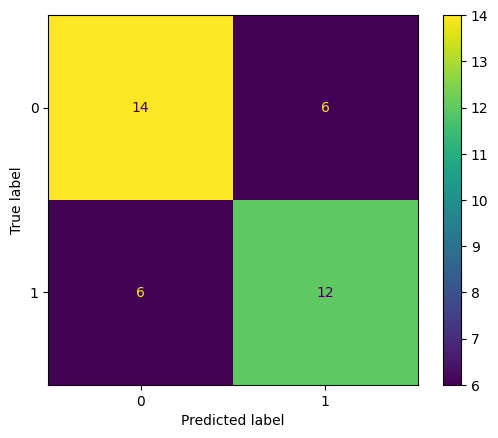

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();



Text(0.5, 427.9555555555555, 'Predicted label')

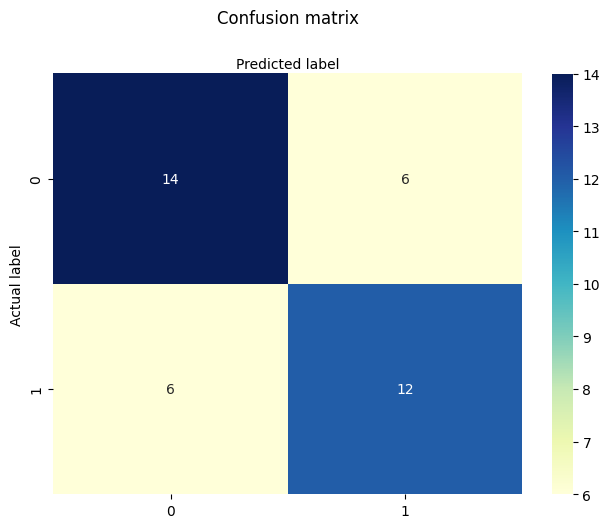

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


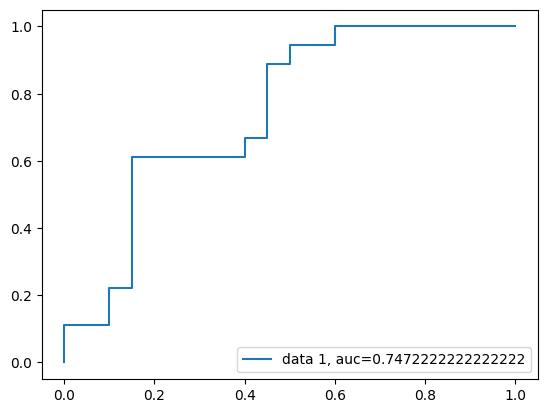

In [46]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



In [61]:
data

,0,1
0,1.0,34.16
1,1.0,42.35
2,1.0,35.16
3,1.0,25.65
4,1.0,18.89
...,...,...
183,2.0,44.90
184,2.0,29.59
185,2.0,25.66
186,2.0,26.14


## Random Forest Feature Selection for EEG w/ age and sex


**Note:**
The first column of data contains sex(1 - female ; 2 - male), the second column constains age, the third column contains speicfic_disorder(4 - Healthy control; 5 - Behavioral addiction disorder), and all the other columns are eeg channels

       0      1
0    1.0  34.16
1    1.0  42.35
2    1.0  35.16
3    1.0  25.65
4    1.0  18.89
..   ...    ...
183  2.0  44.90
184  2.0  29.59
185  2.0  25.66
186  2.0  26.14
187  2.0  29.97

[188 rows x 2 columns]


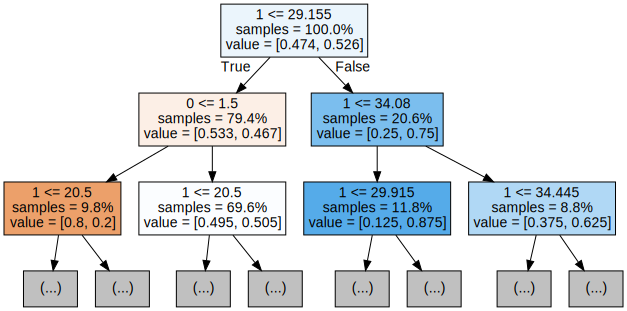

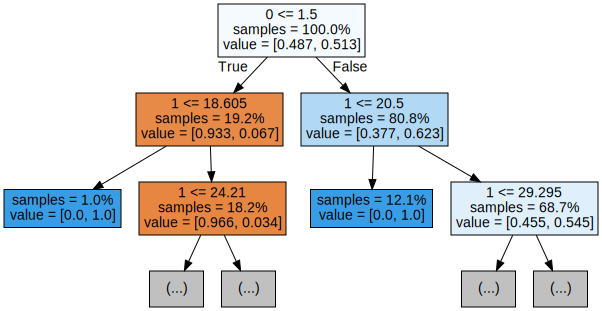

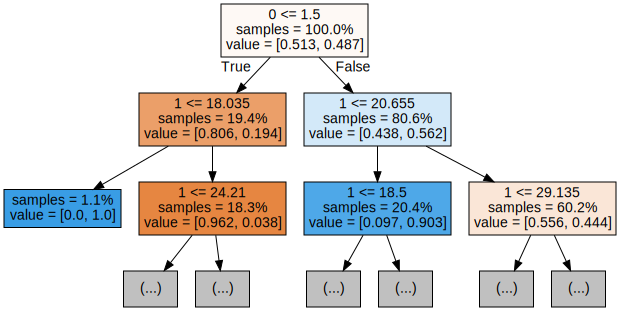

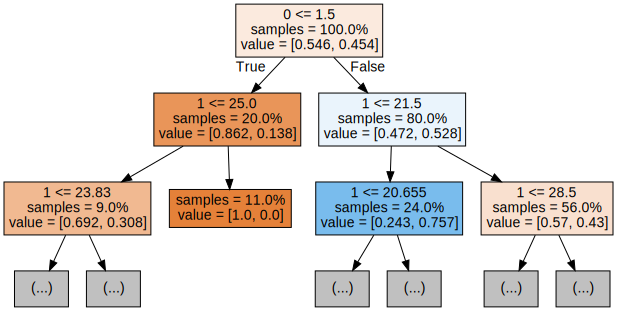

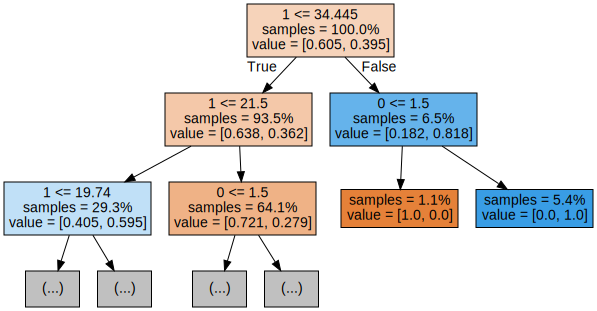

In [64]:
!pip install graphviz
# Install the necessary library
import graphviz
from sklearn.tree import export_graphviz
from io import StringIO  # Replacing six's StringIO
from IPython.display import Image
import pydotplus

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Drop rows with missing values
#X_train_clean = X_train.dropna()
#y_train_clean = y_train[X_train_clean.index]

# Train the random forest on the cleaned dataset
rf.fit(X_train, y_train)

print(data)
# Export and display the first three trees
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names = data.columns.tolist(),
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



## `Age and Sex without EEG - Specific Disorder Prediction`

The higher prediction value when only using age and sex proves that the first model is taking eeg channels into account

In [65]:
data1 = pd.read_csv('/content/NoEEG - only extras.csv')

In [66]:
Y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)

In [67]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(X)

In [68]:
data = pd.DataFrame(data2)
X=data

Y
data

,0,1
0,1.0,34.16
1,1.0,42.35
2,1.0,35.16
3,1.0,25.65
4,1.0,18.89
...,...,...
183,2.0,44.90
184,2.0,29.59
185,2.0,25.66
186,2.0,26.14


In [69]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(38, 2)
(150,)
(38,)


In [70]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7631578947368421


In [71]:
#prediction after fixing class imbalance

from imblearn.over_sampling import RandomOverSampler
Y=Y.astype('str')
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X, Y = oversampler.fit_resample(data2, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

(152, 2)
(38, 2)
(152,)
(38,)
Accuracy: 0.7894736842105263


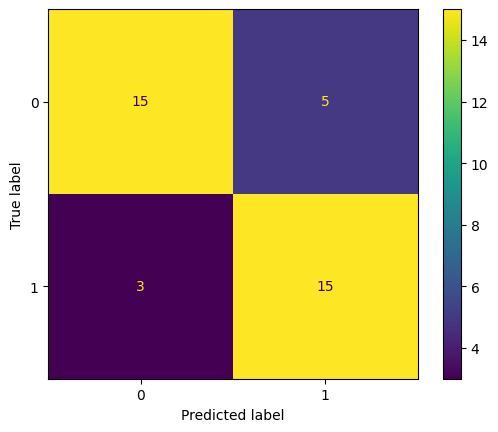

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

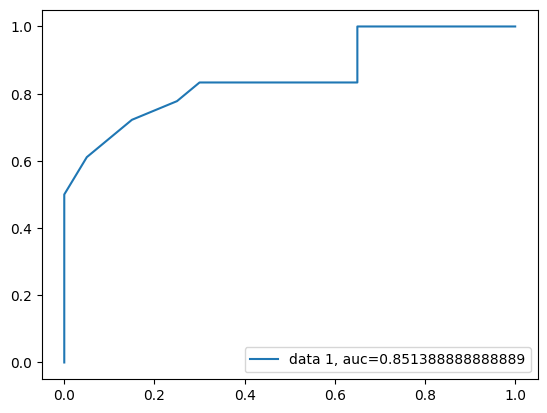

In [73]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()